## Importing relevant libraries


In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,confusion_matrix

from sklearn.linear_model import LogisticRegression

## Loading the Data

In [142]:
raw_data=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Logistic Regression/Heart Failure Prediction/heart_patients_clinical_records.csv')
raw_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,M,No,4,Deceased
1,55.0,No,7861,No,38,No,263358.03,1.1,136,M,No,6,Deceased
2,65.0,No,146,No,20,No,162000.00,1.3,129,M,Yes,7,Deceased
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,M,No,7,Deceased
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,F,No,8,Deceased


In [143]:
data=raw_data.copy()

In [144]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


In [146]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

 No null values found.

### Data Preprocessing

In [147]:
#Mapping the binary data to 0 and 1
data['anaemia']=data['anaemia'].map({'Yes':1,'No':0})
data['diabetes']=data['diabetes'].map({'Yes':1,'No':0})
data['high_blood_pressure']=data['high_blood_pressure'].map({'Yes':1,'No':0})
data['smoking']=data['smoking'].map({'Yes':1,'No':0})
data['sex']=data['sex'].map({'M':1,'F':0})

In [148]:
#Mapping the target variable 
data['DEATH_EVENT']=data['DEATH_EVENT'].map({'Deceased':1,'Not Deceased':0})

In [149]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


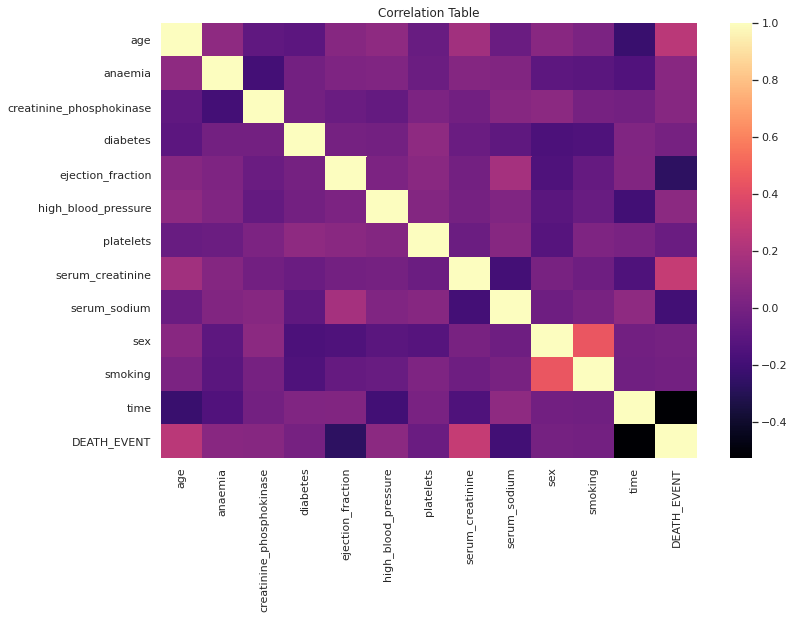

In [150]:
#Correlation Table
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='magma')
plt.title('Correlation Table')
plt.show()

## Exploratory Data Analysis

### Binary Data plots

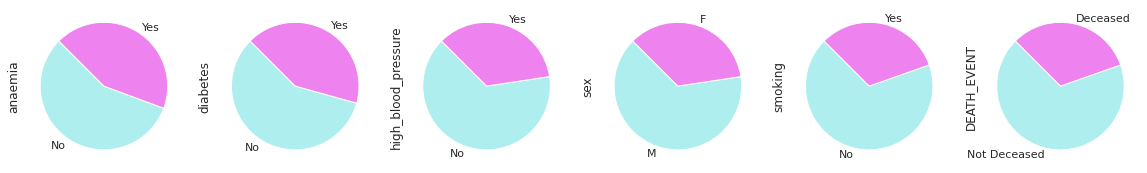

In [151]:
colorlist=['paleturquoise','violet']
N_col = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
plt.figure(figsize=(20,60), facecolor='white')
plotnum=1
for col in N_col:
    ax=plt.subplot(1,6,plotnum)
    raw_data[col].value_counts().plot.pie(colors=colorlist,startangle=135)
    plotnum+=1
plt.show()

### Distribution Plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

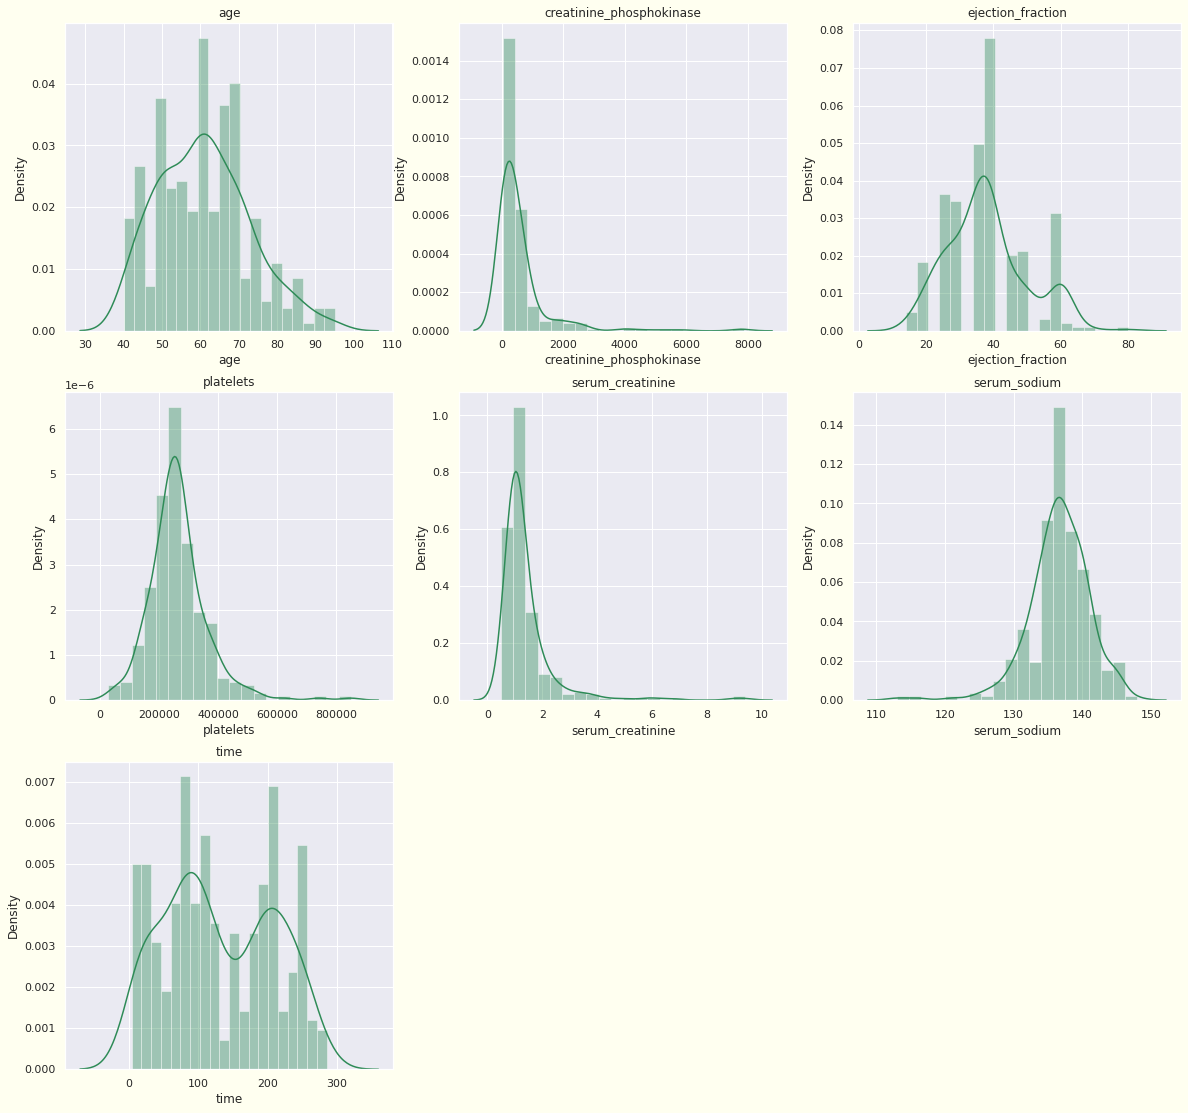

In [152]:
N_col = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
plt.figure(figsize=(20,60), facecolor='ivory')
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.distplot(data[col], bins=20,color='seagreen')
    plt.title(col)
    plotnum+=1
plt.show()

## Logistic Regression Model





#### Defining features and targets.

In [153]:
x1=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

#### Scaling the values.

In [154]:
scaler=MinMaxScaler()
scaler.fit_transform(x1)

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.        ],
       [0.27272727, 0.        , 1.        , ..., 1.        , 0.        ,
        0.00711744],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 1.        ,
        0.01067616],
       ...,
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.        ,
        0.97508897],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.98220641],
       [0.18181818, 0.        , 0.02207196, ..., 1.        , 1.        ,
        1.        ]])

#### Performing Train-Test Split

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=69)

#### Regression Itself

In [156]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

train_accuracy=model.score(x_train,y_train)
test_accuracy=model.score(x_test,y_test)
f1_score=f1_score(y_test,y_pred)
r_score=recall_score(y_test,y_pred)

In [157]:
Accuracy=pd.DataFrame({'Train':train_accuracy,'Test':test_accuracy},index=['Accuracy'])
Accuracy

,Train,Test
Accuracy,0.824268,0.816667


In [158]:
# The F1 score
f1_score

0.7027027027027027

In [159]:
# The recall score
r_score

0.65

#### Confusion Matrix

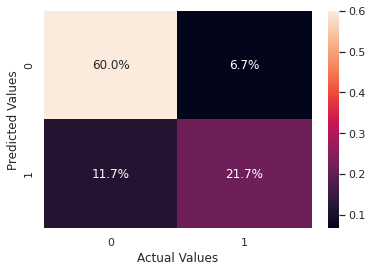

In [160]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.1%')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### The weights and intercepts.

In [161]:
results=pd.DataFrame({'Features':list(x1.columns),'Weights':list(model.coef_[0])})
print('Intercept:',model.intercept_)

Intercept: [0.00016182]


In [162]:
results

,Features,Weights
0,age,4.381340e-02
1,anaemia,6.136986e-04
2,creatinine_phosphokinase,1.533754e-04
3,diabetes,3.563247e-04
4,ejection_fraction,-6.883800e-02
5,high_blood_pressure,-7.065533e-05
6,platelets,-7.759516e-08
7,serum_creatinine,6.653694e-03
8,serum_sodium,9.525833e-03
9,sex,4.230106e-05


<Figure size 864x576 with 0 Axes>

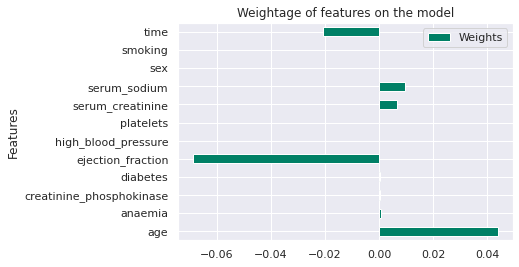

In [163]:
plt.figure(figsize=(12,8))
results.plot.barh(x='Features',y='Weights',title='Weightage of features on the model',cmap='summer')
plt.show()

#### Sex, smoking, platelets, high blood pressure, diabetes, creatinine phosphokinase and anaemia doesnt contribute much as compared to other Features to the model.

## End of Logistic Regression 